In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale, minmax_scale, robust_scale

#scaling
from sklearn.preprocessing import StandardScaler
#데이터 분할
from sklearn.model_selection import train_test_split
#로지스틱 회귀
from statsmodels.api import Logit
#평가함수
from sklearn.metrics import accuracy_score
#confusion matrix
from sklearn.metrics import confusion_matrix
#설명변수 데이터 생성
#df1_x = df1.drop(['new_judge',''], axis = 1)
from statsmodels.api import qqplot, add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [15]:
plt.rc('font', family='NanumGothic')

In [16]:
df = pd.read_csv('insu_pre_review.csv',engine='python', encoding = 'EUC-KR')
df

,customer_id,review_cat,judge,review_date,gender,age,height,weight,bust,waist,...,bt_mch_judge,bt_mchc_judge,bt_mvc_judge,bt_plat_judge,bt_rbc_judge,bt_wbc_judge,bt_rgpt_judge,bt_sgot_judge,bt_sgpt_judge,bt_trig_judge
0,C112346,혈액검사,재검,2014-10-09,1,70,165,63,92.0,88.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,C112350,일반검진,재검,2014-11-18,1,69,178,75,99.0,92.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,C112355,일반검진,재검,2015-03-18,1,70,169,69,96.0,88.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,C112356,혈액검사,재검,2015-09-28,1,70,165,64,103.0,92.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,C112358,혈액검사,거절,2015-02-24,1,70,166,73,100.0,91.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14933,C134246,혈액검사,승인,2015-02-11,2,63,150,53,94.0,80.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
14934,C134250,일반검진,승인,2015-09-16,2,52,164,60,90.0,66.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14935,C134251,일반검진,재검,2015-06-21,2,57,157,48,89.0,72.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14936,C134252,혈액검사,재검,2015-06-26,2,66,150,47,86.0,84.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
df['bmi'] = df['weight']/(df['height']/100)**2

In [18]:
df['judge'].value_counts()

재검    8149
승인    3962
거절    2827
Name: judge, dtype: int64

# 승인과 거절 로지스틱 회귀분석

In [19]:
df_approved_and_denied = df[df['judge'] != '재검']
df_approved_and_denied.head()

,customer_id,review_cat,judge,review_date,gender,age,height,weight,bust,waist,...,bt_mchc_judge,bt_mvc_judge,bt_plat_judge,bt_rbc_judge,bt_wbc_judge,bt_rgpt_judge,bt_sgot_judge,bt_sgpt_judge,bt_trig_judge,bmi
4,C112358,혈액검사,거절,2015-02-24,1,70,166,73,100.0,91.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,26.491508
5,C112361,혈액검사,승인,2015-06-28,1,70,169,70,98.0,90.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.508946
7,C112365,일반검진,승인,2014-11-19,1,69,160,67,96.0,91.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.171875
9,C112369,일반검진,승인,2015-03-20,1,70,168,60,95.0,86.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.258503
12,C112374,혈액검사,거절,2015-01-22,1,70,175,66,98.0,84.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.551020


In [20]:
df_approved_and_denied.isnull().sum()

customer_id             0
review_cat              0
judge                   0
review_date             0
gender                  0
age                     0
height                  0
weight                  0
bust                    2
waist                   2
bp_min                  0
bp_max                  0
pulse_count             1
bt_chol              1623
bt_crea              4221
bt_gluc              1623
bt_hb                3216
bt_hbsa              1623
bt_hct               3216
bt_mch               3216
bt_mchc              3216
bt_mvc               3216
bt_plat              3216
bt_rbc               3216
bt_wbc               3216
bt_rgpt              3720
bt_sgot              3631
bt_sgpt              1623
bt_trig              3821
judge_score             0
bp_judge                0
pulse_count_judge       0
bt_chol_judge        1623
bt_crea_judge        1623
bt_gluc_judge        1623
bt_hb_judge          1623
bt_hbsa_judge        1623
bt_hct_judge         1623
bt_mch_judge

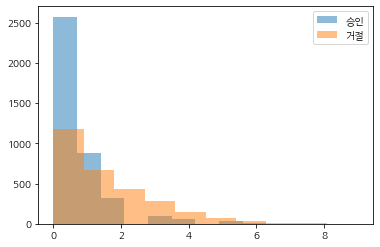

In [21]:
plt.hist(df_approved_and_denied[df_approved_and_denied['judge'] == '승인']['judge_score'], label = '승인', alpha = 0.5)
plt.hist(df_approved_and_denied[df_approved_and_denied['judge'] == '거절']['judge_score'], label = '거절', alpha = 0.5)
plt.legend()

In [22]:
# df_approved_and_denied의 bt를 가진 column을 삭제한다.
df_approved_and_denied = df_approved_and_denied.loc[:,~df.columns.str.startswith('bt')]

In [23]:
df_approved_and_denied.head()

,customer_id,review_cat,judge,review_date,gender,age,height,weight,bust,waist,bp_min,bp_max,pulse_count,judge_score,bp_judge,pulse_count_judge,bmi
4,C112358,혈액검사,거절,2015-02-24,1,70,166,73,100.0,91.0,85,130,76.0,1,1,0,26.491508
5,C112361,혈액검사,승인,2015-06-28,1,70,169,70,98.0,90.0,80,125,68.0,0,1,0,24.508946
7,C112365,일반검진,승인,2014-11-19,1,69,160,67,96.0,91.0,80,120,68.0,0,0,0,26.171875
9,C112369,일반검진,승인,2015-03-20,1,70,168,60,95.0,86.0,80,130,64.0,0,1,0,21.258503
12,C112374,혈액검사,거절,2015-01-22,1,70,175,66,98.0,84.0,90,160,72.0,0,1,0,21.551020


In [24]:
df_approved_and_denied.isnull().sum()

customer_id          0
review_cat           0
judge                0
review_date          0
gender               0
age                  0
height               0
weight               0
bust                 2
waist                2
bp_min               0
bp_max               0
pulse_count          1
judge_score          0
bp_judge             0
pulse_count_judge    0
bmi                  0
dtype: int64

In [25]:
df_approved_and_denied = df_approved_and_denied.dropna()

In [26]:
#로지스틱회귀 분석 진행

In [27]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

#scaling
from sklearn.preprocessing import StandardScaler
#데이터 분할
from sklearn.model_selection import train_test_split
#로지스틱 회귀
from statsmodels.api import Logit
#평가함수
from sklearn.metrics import accuracy_score
#confusion matrix
from sklearn.metrics import confusion_matrix

In [28]:
df_approved_and_denied['judge'].value_counts()

승인    3960
거절    2826
Name: judge, dtype: int64

In [29]:
df_approved_and_denied['judge'] = np.where(df_approved_and_denied['judge'] == '승인', 0 ,1 )
df_approved_and_denied['gender'] = df_approved_and_denied['gender'].astype('object')

In [30]:
df_approved_and_denied.head()

,customer_id,review_cat,judge,review_date,gender,age,height,weight,bust,waist,bp_min,bp_max,pulse_count,judge_score,bp_judge,pulse_count_judge,bmi
4,C112358,혈액검사,1,2015-02-24,1,70,166,73,100.0,91.0,85,130,76.0,1,1,0,26.491508
5,C112361,혈액검사,0,2015-06-28,1,70,169,70,98.0,90.0,80,125,68.0,0,1,0,24.508946
7,C112365,일반검진,0,2014-11-19,1,69,160,67,96.0,91.0,80,120,68.0,0,0,0,26.171875
9,C112369,일반검진,0,2015-03-20,1,70,168,60,95.0,86.0,80,130,64.0,0,1,0,21.258503
12,C112374,혈액검사,1,2015-01-22,1,70,175,66,98.0,84.0,90,160,72.0,0,1,0,21.551020


In [31]:
df_approved_and_denied.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6786 entries, 4 to 14937
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        6786 non-null   object 
 1   review_cat         6786 non-null   object 
 2   judge              6786 non-null   int64  
 3   review_date        6786 non-null   object 
 4   gender             6786 non-null   object 
 5   age                6786 non-null   int64  
 6   height             6786 non-null   int64  
 7   weight             6786 non-null   int64  
 8   bust               6786 non-null   float64
 9   waist              6786 non-null   float64
 10  bp_min             6786 non-null   int64  
 11  bp_max             6786 non-null   int64  
 12  pulse_count        6786 non-null   float64
 13  judge_score        6786 non-null   int64  
 14  bp_judge           6786 non-null   int64  
 15  pulse_count_judge  6786 non-null   int64  
 16  bmi                6786

In [32]:
df_approved_and_denied['gender'] = df_approved_and_denied['gender'].astype('object')
df_approved_and_denied['bmi'] = df_approved_and_denied['weight']/(df_approved_and_denied['height']/100)**2

In [33]:
df_approved_and_denied

,customer_id,review_cat,judge,review_date,gender,age,height,weight,bust,waist,bp_min,bp_max,pulse_count,judge_score,bp_judge,pulse_count_judge,bmi
4,C112358,혈액검사,1,2015-02-24,1,70,166,73,100.0,91.0,85,130,76.0,1,1,0,26.491508
5,C112361,혈액검사,0,2015-06-28,1,70,169,70,98.0,90.0,80,125,68.0,0,1,0,24.508946
7,C112365,일반검진,0,2014-11-19,1,69,160,67,96.0,91.0,80,120,68.0,0,0,0,26.171875
9,C112369,일반검진,0,2015-03-20,1,70,168,60,95.0,86.0,80,130,64.0,0,1,0,21.258503
12,C112374,혈액검사,1,2015-01-22,1,70,175,66,98.0,84.0,90,160,72.0,0,1,0,21.551020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14931,C134240,일반검진,1,2015-08-27,2,22,160,47,80.0,60.0,60,100,82.0,0,0,0,18.359375
14932,C134241,혈액검사,0,2015-09-28,2,27,159,48,82.0,68.0,70,110,62.0,0,0,0,18.986591
14933,C134246,혈액검사,0,2015-02-11,2,63,150,53,94.0,80.0,80,120,74.0,1,0,0,23.555556
14934,C134250,일반검진,0,2015-09-16,2,52,164,60,90.0,66.0,80,120,70.0,0,0,0,22.308150


### insu_pre_review 승인-거절 Logistic Regression 결과

In [36]:
# 승인과 거절을 목표변수로 Logistic Regression을 진행하였다.
df_train, df_test = train_test_split(df_approved_and_denied, test_size = 0.3 , random_state = 1234)
print(f'train data size : {df_train.shape}')
print(f'test data size : {df_test.shape}')

#from_formula 함수를 이용하여 변수 역할 지정
#분석 대상 이벤트 = 1
log_model = Logit.from_formula('''judge ~ C(review_cat) + age + height + bmi + C(gender) + bust  + pulse_count + C(bp_judge) + bp_min + bp_max''', df_train)

#적합
log_result = log_model.fit()
#결과 출력
print(log_result.summary())

train data size : (4750, 17)
test data size : (2036, 17)
Optimization terminated successfully.
         Current function value: 0.642668
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                  judge   No. Observations:                 4750
Model:                          Logit   Df Residuals:                     4739
Method:                           MLE   Df Model:                           10
Date:                Mon, 30 Nov 2020   Pseudo R-squ.:                 0.05356
Time:                        10:41:03   Log-Likelihood:                -3052.7
converged:                       True   LL-Null:                       -3225.4
Covariance Type:            nonrobust   LLR p-value:                 3.537e-68
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -3.3

# insu_pre_review와 insu_request merge

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale, minmax_scale, robust_scale

#scaling
from sklearn.preprocessing import StandardScaler
#데이터 분할
from sklearn.model_selection import train_test_split
#로지스틱 회귀
from statsmodels.api import Logit
#평가함수
from sklearn.metrics import accuracy_score
#confusion matrix
from sklearn.metrics import confusion_matrix
#설명변수 데이터 생성
#df1_x = df1.drop(['new_judge',''], axis = 1)
from statsmodels.api import qqplot, add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [40]:
df_insu_pre_preview = pd.read_csv('insu_pre_review.csv', encoding = 'EUC-KR')
df_insu_pre_preview.head()

,customer_id,review_cat,judge,review_date,gender,age,height,weight,bust,waist,...,bt_mch_judge,bt_mchc_judge,bt_mvc_judge,bt_plat_judge,bt_rbc_judge,bt_wbc_judge,bt_rgpt_judge,bt_sgot_judge,bt_sgpt_judge,bt_trig_judge
0,C112346,혈액검사,재검,2014-10-09,1,70,165,63,92.0,88.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,C112350,일반검진,재검,2014-11-18,1,69,178,75,99.0,92.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,C112355,일반검진,재검,2015-03-18,1,70,169,69,96.0,88.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,C112356,혈액검사,재검,2015-09-28,1,70,165,64,103.0,92.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,C112358,혈액검사,거절,2015-02-24,1,70,166,73,100.0,91.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [42]:
df_insu_request =  pd.read_csv('insu_request.csv', encoding = 'EUC-KR')
df_insu_request.head()

,customer_id,review_cat,judge,gender,age,insu_id,insu_contract_date,insu_prod_id,insu_prod_name,req_id,...,sick_3rd,dg_cat,dg_start_date,dg_end_date,dg_duration,insu_req_amount,insu_pay_amount,insu_pay_date,insu_duration,insu_cum_amount
0,C112379,혈액검사,재검,1,69,INS-10484,08-Dec-14,PR-20363,가족 만족 보험 1,C112379-20101118-12660-01-001,...,NaN,외래,24-Oct-15,16-Nov-15,24,424498,724498.0,18-Nov-15,11,1320000
1,C112379,혈액검사,재검,1,69,INS-10484,08-Dec-14,PR-20363,가족 만족 보험 1,C112379-20110314-17403-01-001,...,NaN,외래,17-Feb-16,17-Feb-16,1,34950,490079.0,13-Mar-16,15,1800000
2,C112379,혈액검사,재검,1,69,INS-10484,08-Dec-14,PR-20363,가족 만족 보험 1,C112379-20110314-17403-01-001,...,NaN,외래,24-Feb-16,24-Feb-16,1,0,490079.0,13-Mar-16,15,1800000
3,C112379,혈액검사,재검,1,69,INS-10484,08-Dec-14,PR-20363,가족 만족 보험 1,C112379-20110314-17403-01-001,...,NaN,외래,02-Mar-16,02-Mar-16,1,0,490079.0,13-Mar-16,15,1800000
4,C112379,혈액검사,재검,1,69,INS-10484,08-Dec-14,PR-20363,가족 만족 보험 1,C112379-20110314-17403-01-001,...,NaN,외래,09-Mar-16,09-Mar-16,1,16000,490079.0,13-Mar-16,15,1800000


In [45]:
df_insu_request_id = pd.DataFrame(df_insu_request['customer_id'].unique())
df_insu_request_id.columns = ['customer_id']
df_insu_request_id.head()

,customer_id
0,C112379
1,C112404
2,C112411
3,C112570
4,C112727


In [48]:
df_pre_review_request_merge = pd.merge(df_insu_request_id, df_insu_pre_preview, on = 'customer_id')
df_pre_review_request_merge.head()

,customer_id,review_cat,judge,review_date,gender,age,height,weight,bust,waist,...,bt_mch_judge,bt_mchc_judge,bt_mvc_judge,bt_plat_judge,bt_rbc_judge,bt_wbc_judge,bt_rgpt_judge,bt_sgot_judge,bt_sgpt_judge,bt_trig_judge
0,C112379,혈액검사,재검,2014-12-09,1,69,160,59,84.0,72.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,C112404,혈액검사,재검,2015-03-29,1,69,175,79,101.0,92.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,C112411,일반검진,재검,2015-09-20,1,69,165,70,92.0,88.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,C112570,일반검진,재검,2015-05-27,1,67,165,75,95.0,89.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,C112727,일반검진,승인,2015-06-24,1,65,160,50,89.0,66.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
# pre_review_request_merged.csv 파일 내보내기
df_pre_review_request_merge.to_csv('pre_review_request_merged.csv',encoding = 'euckr')